In [1]:
# ALlows charts to appear in the notebook
%matplotlib inline

# Libraries for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

#Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [27]:
# Read in muffin and cupcake ingredient data
recipes=pd.read_csv(r'C:\Users\annyu\Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [14]:
import os
print(os.path.join('C:', 'Users', 'annyu', '.jupyter', 'Muffins.csv'))

C:Users\annyu\.jupyter\Muffins.csv


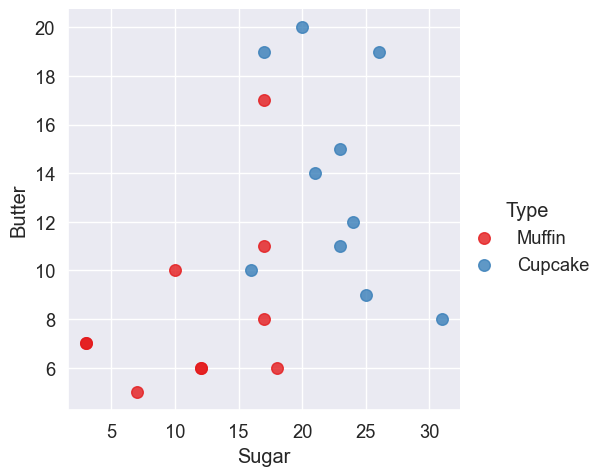

In [33]:
# Plot two ingredients
# Create scatterplot of dataframe

sns.lmplot(x='Sugar', y='Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.show()

In [37]:
# Specify inputs for the model
# sugar_butter=recipes[['Sugar','Butter'J].as_matrix()整販

sugar_butter=recipes[[ 'Sugar' ,'Butter']].to_numpy()
type_label=np.where(recipes['Type']=='Muffin', 0,1)

In [38]:
# Fit the SVM model

model=svm.SVC(kernel='linear',C=2**-5)

In [39]:
model.fit(sugar_butter,type_label)

SVC(C=0.03125, kernel='linear')

In [40]:
# Get the separating hyperpane

w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0]/w[1])

In [41]:
# PLot the parallels to the separating hyperplane
# that pass through the support vectors

b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

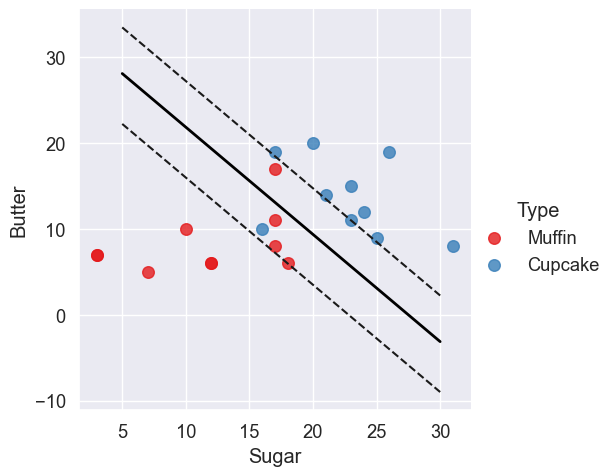

In [51]:
# Look at the margins and support vectors

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
           s=80, facecolors='none')
plt.show()

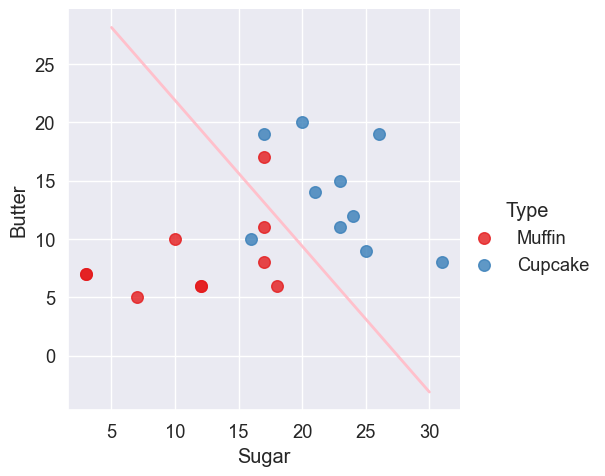

In [52]:
# PLot the hyperplane

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='pink')

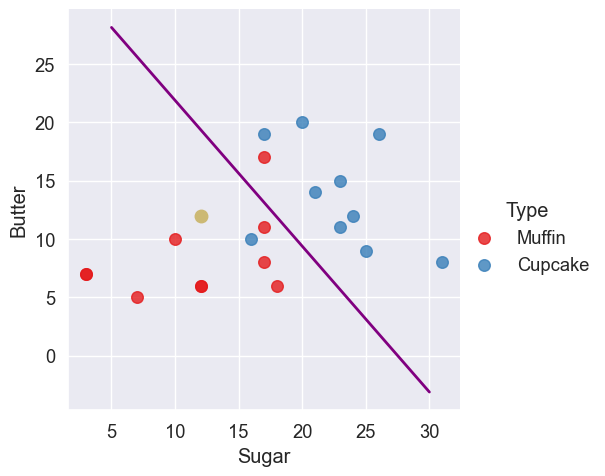

In [64]:
# PLot the point to visually see where the point Lies

sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='purple')
plt.plot(12, 12, 'yo', markersize='9')
plt.show()

In [65]:
# Create a function to guess when a recipe is a muffin
# or a cupcake using the SVM model we created

def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [66]:
# predict if 12 parts butter and sugar

muffin_or_cupcake(12,12)

You're looking at a muffin recipe!


In [67]:
# Fit the SVM model

model=svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(sugar_butter,type_label)

SVC(kernel='linear')

In [68]:
# Fit the SvM model for more than 2 classes

model=svm. SVC(kernel='rbf',C=1, gamma=2**-5)
model.fit(sugar_butter, type_label)

SVC(C=1, gamma=0.03125)